Exploratory Data Analysis

EDA | Netflix Original Films & IMDB Scores Dataset

BUSINESS UNDERSTANDING

Netflix adalah salah satu platform streaming terbesar di dunia, dengan ribuan konten yang tersedia, mulai dari film, serial, hingga produksi original. Namun, tidak semua konten mendapatkan tingkat popularitas yang sama. Dalam menghadapi persaingan yang semakin ketat, penting bagi Netflix untuk mengklasifikasikan konten mereka berdasarkan popularitas, salah satunya dengan menggunakan IMDb score sebagai indikator utama. Tujuan utama dari analisis ini adalah untuk mengklasifikasikan konten Netflix menjadi dua kategori berdasarkan IMDb score: Populer (IMDb score 6.1 - 10) dan Tidak Populer (IMDb score 0 - 6). Pertanyaan utama yang ingin dijawab adalah: Bagaimana cara mengklasifikasikan konten baru sebagai populer atau tidak populer berdasarkan IMDb score?

1. Mengimpor Library yang Dibutuhkan

Langkah pertama adalah mengimpor Library Python yang relevan, seperti:

- Pandas: untuk memproses dan menganalisis data.
- Matplotlib dan Seaborn: untuk membuat visualisasi grafik.

In [37]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk menampilkan semua kolom sampai 200
pd.set_option('display.max_columns', 200) 

# Mengatur gaya plot untuk visualisasi yang konsisten
plt.style.use('ggplot')

In [38]:
# Read dataset
df = pd.read_excel('Dataset/NetflixOriginals.xlsx')

DATA UNDERSTANDING

2. Memuat dan Memeriksa Dataset

Memuat dataset ke dalam Python menggunakan pandas.read_excel() dan melakukan pemeriksaan awal:

- data.shape : Untuk melihat jumlah baris dan kolom.
- data.head(): Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.
- data.info(): Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- data.describe() : Untuk menampilkan data numerik. 

In [39]:
# Memuat dataset
file_path = 'Dataset/NetflixOriginals.xlsx'
data = pd.read_excel(file_path)

In [40]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(584, 6)

In [41]:
# Melihat beberapa baris pertama dataset
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


3. Gambaran Umum Dataset

Sebelum melakukan analisis lebih rinci, penting untuk memahami struktur dataset.

In [42]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [43]:
# Statistik ringkasan dari dataset
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


4. Preprocessing Data / Data Cleaning

Tujuannya adalah untuk melakukan pembersihan terhadap data sebelum ke tahapan analisis

- Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values).
- Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values).
- Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values).
- Menghapus kolom-kolom yang tidak dibutuhkan

In [44]:
data.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [45]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [46]:
# mencari missing value
data.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [47]:
# mencari apakah ada data yang duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
579    False
580    False
581    False
582    False
583    False
Length: 584, dtype: bool

In [48]:
data.loc[data.duplicated()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language


In [49]:
data.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


5. Melakukan Analisis Statistik Deskriptif

Kita akan menghitung ukuran statistik utama seperti mean, median, mode, standar deviasi, dan persentil untuk kolom-kolom numerik yang penting.
Menghitung statistik dasar untuk mendapatkan gambaran umum tentang data:

- Mean (Rata-rata): Nilai rata-rata dari data.
- Median: Nilai tengah dari data.
- Mode (Modus): Nilai yang paling sering muncul.
- Standar Deviasi: Untuk melihat variasi atau penyebaran data.
- Min dan Max: Nilai minimum dan maksimum dalam data.
- Persentil dan Kuartil: Pembagian data ke dalam bagian yang lebih kecil.

In [50]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [51]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = [
    'Runtime', 'IMDB Score'
]

# Statistik deskriptif: mean, median, std, dll.
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics

,count,mean,std,min,25%,50%,75%,max,mode
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0,97.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0,5.8


Gambaran Hasil Analisis Statistik:

Runtime (Durasi Film): Durasi rata-rata film adalah 93,58 menit, menunjukkan bahwa sebagian besar film memiliki durasi khas untuk film layar lebar.
IMDB Score: Skor rata-rata film adalah 6,27, menunjukkan bahwa kebanyakan film dinilai cukup baik oleh audiens.

Dataset ini mencerminkan keberagaman durasi dan kualitas film, dengan kecenderungan mayoritas film berdurasi standar dan memiliki skor penilaian yang cukup baik. 

6. Visualisasi Data
Visualisasi sangat penting untuk memahami pola dalam data. Beberapa visualisasi dasar yang sering digunakan dalam EDA adalah:

- Histogram: Menampilkan distribusi frekuensi data.
- Boxplot: Menampilkan penyebaran data dan mengidentifikasi outliers (nilai pencilan).
- Scatter Plot: Memvisualisasikan hubungan antara dua variabel.
- Heatmap: Untuk melihat korelasi antar variabel.
- Line Plot: Untuk memvisualisasikan tren data dari waktu ke waktu.

Visualisasi 1: Histogram Distribusi IMDB Score

Untuk memahami distribusi IMDB Score.

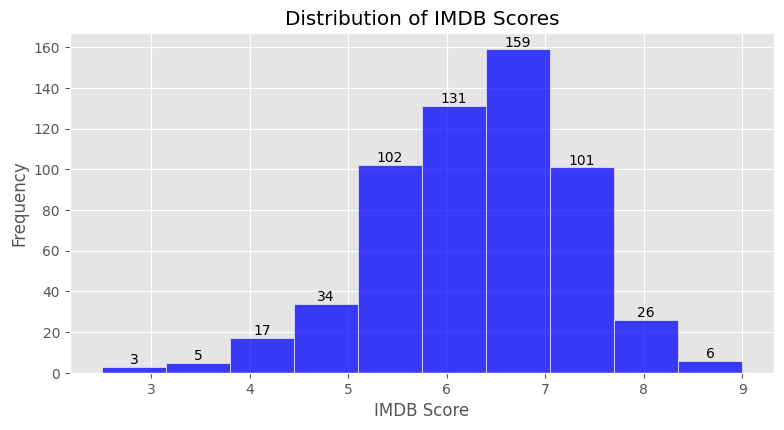

In [52]:
# Set ukuran visualisasi
plt.figure(figsize=(20, 15))

# 1. Histogram of IMDB Score
plt.subplot(3, 2, 1)
ax = sns.histplot(df['IMDB Score'], bins=10, color='blue')
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.show()


Insights:
Distribusi skor IMDb menunjukkan bahwa sebagian besar film memiliki skor antara 6 hingga 7, dengan puncaknya di sekitar 7.
Skor ini menunjukkan bahwa mayoritas film Netflix memiliki kualitas yang dianggap cukup baik oleh penonton.
Secara keseluruhan, persebaran skor IMDB menunjukkan bahwa mayoritas film Netflix berada dalam kelompok skor menengah,dengan lebih sedikit film di kelompok tertinggi atau terendah.

Visualisasi 2: Boxplot 

Untuk memvisualisasikan skor IMDb berdasarkan bahasa.

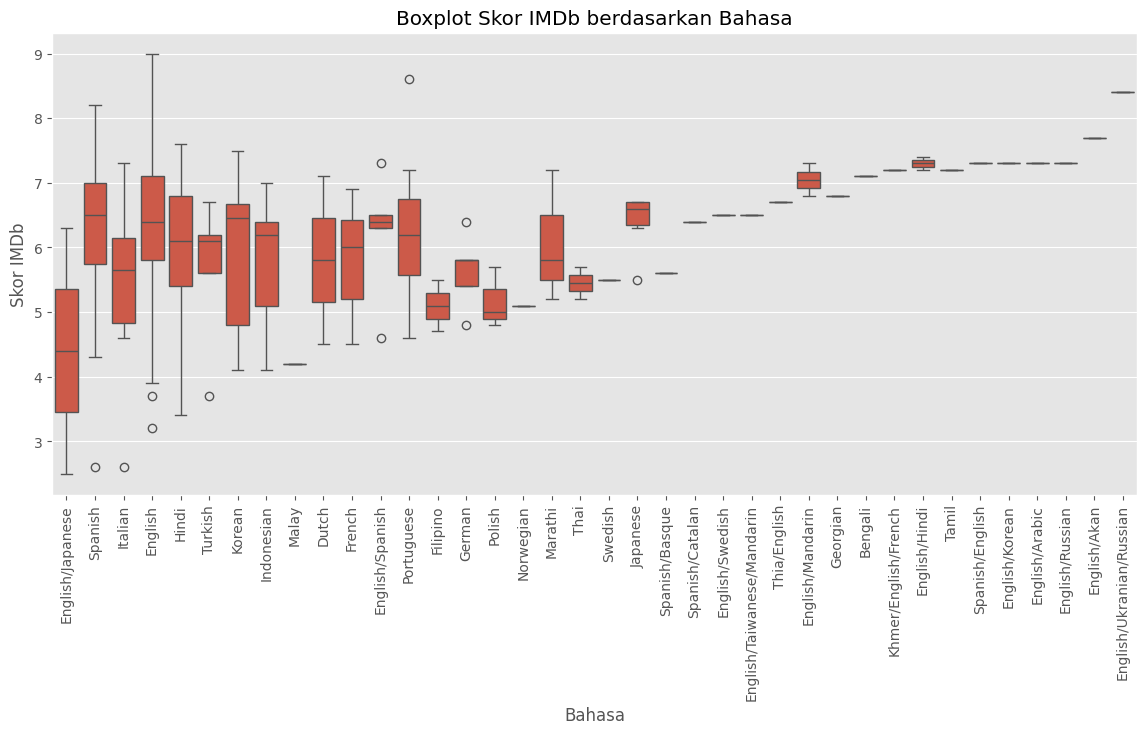

In [53]:
# 2. Boxplot of IMDB Score by Language

# Membuat boxplot skor IMDb berdasarkan bahasa
plt.figure(figsize=(14, 6))
sns.boxplot(x='Language', y='IMDB Score', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot Skor IMDb berdasarkan Bahasa')
plt.ylabel('Skor IMDb')
plt.xlabel('Bahasa')
plt.show()


Insights:
1. Bahasa seperti English, Spanish, dan Italian memiliki rentang skor IMDb yang cukup lebar. Artinya, film dalam bahasa-bahasa ini memiliki kualitas yang bervariasi dari segi skor.
2. Bahasa English mendominasi jumlah data (berdasarkan lebar boxplot), mencerminkan banyaknya produksi film dalam bahasa ini.

Visualisasi 3: Scatter Plot Hubungan antara IMDB Score dan Tahun.

Untuk melihat apakah ada hubungan antara IMDB Score dan Tahun.

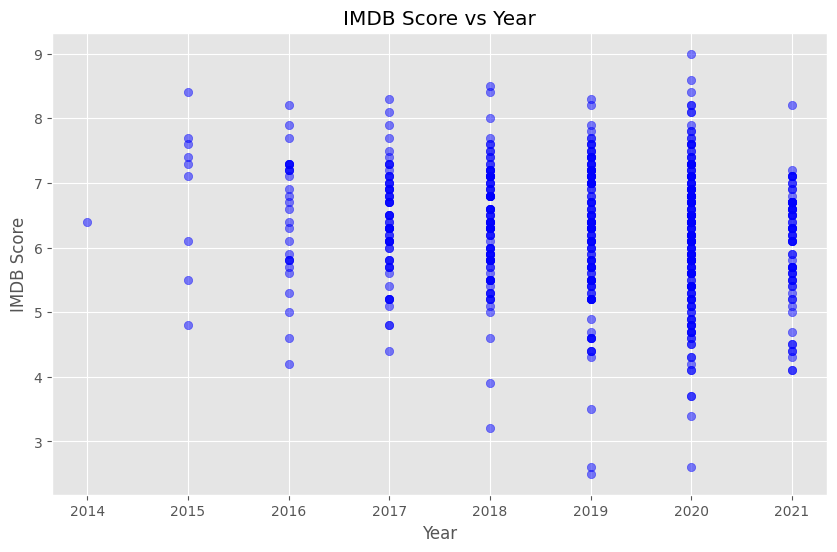

In [54]:
#3. Scatter Plot: Hubungan antara IMDB Score dan Tahun
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')
df['Year'] = df['Premiere'].dt.year

plt.figure(figsize=(10,6))
plt.scatter(df['Year'], df['IMDB Score'], alpha=0.5, color='blue')
plt.title('IMDB Score vs Year')
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.show()


Insights:
Visualisasi menunjukkan bahwa nilai IMDB Score berkisar antara 3 hingga 9 untuk film-film yang dirilis dari tahun 2014 hingga 2021. Tidak terdapat pola kenaikan atau penurunan yang konsisten pada skor IMDB. Titik-titik data tersebar merata di setiap tahun, yang menunjukkan bahwa skor film tidak tergantung pada tahun rilis tertentu. Namun, sebagian besar skor film berada di 5 hingga 8 pada setiap tahunnya.

Visualisasi 4: Heatmap Korelasi Antara Variabel

Untuk mengidentifikasi korelasi antar variabel.

Text(0.5, 1.0, 'Heatmap of Correlations')

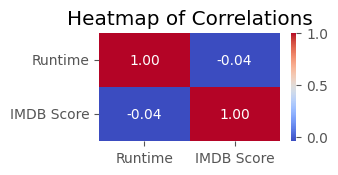

In [55]:
# 4. Heatmap of Correlation
plt.subplot(3, 2, 4)
correlation = df[['Runtime', 'IMDB Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')

Insights:
Nilai korelasi sebesar -0.04 menunjukkan hubungan yang sangat lemah dan hampir tidak ada hubungan linier antara runtime (durasi film) dan skor IMDB.

Visualisasi 5: Line Plot 

Untuk mengamati tren IMDB Score dari tahun ke tahun.

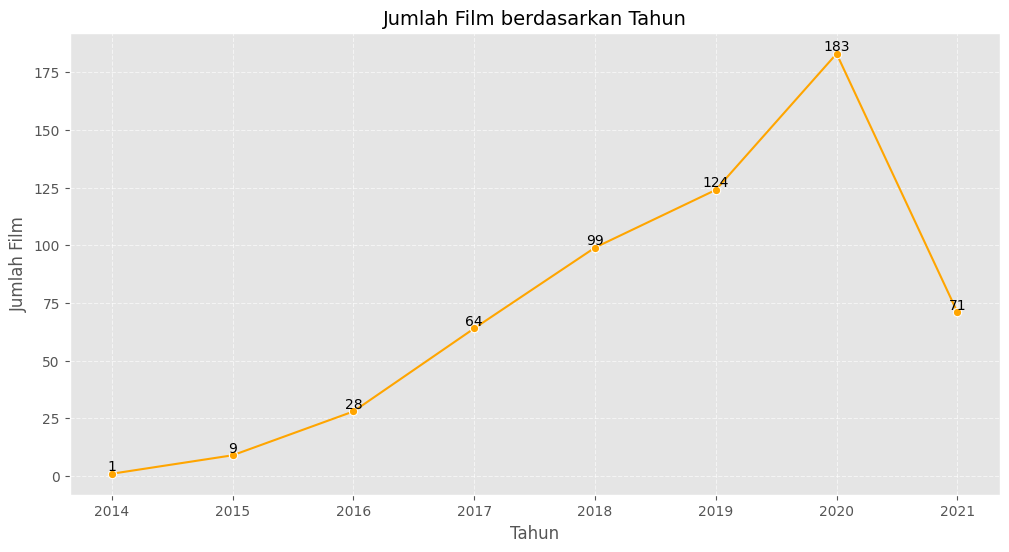

In [56]:
# 5. Line Plot of Average IMDB Score by Year

data['Year'] = pd.to_datetime(data['Premiere'], errors='coerce').dt.year
films_per_year = data['Year'].value_counts().sort_index().reset_index(name='Film Count')

# Membuat line plot jumlah film berdasarkan tahun dengan label jumlah di tiap titik
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Film Count', data=films_per_year, marker='o', color='orange')

for i in range(len(films_per_year)):
    plt.text(films_per_year['Year'].iloc[i], films_per_year['Film Count'].iloc[i],
             str(films_per_year['Film Count'].iloc[i]), color='black', ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Film berdasarkan Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


Insights:
Jumlah film yang dirilis setiap tahun menunjukkan perkembangan yang signifikan dari 2014 hingga 2020. Dimulai dengan hanya 1 film pada 2014, jumlahnya meningkat pesat hingga mencapai puncaknya pada 2020 dengan 183 film. Namun, pada 2021, jumlah tersebut turun drastis menjadi 71 film. Tren ini mencerminkan film yang terus berkembang meskipun menghadapi tantangan.

7. Kesimpulan

Dari seluruh visualisasi, kita dapat memahami bahwa:
- Netflix mengalami peningkatan produksi film dari 2014 hingga puncaknya pada 2020, namun menurun tajam pada 2021.
- Sebagian besar film memiliki skor IMDb 6–7, mencerminkan kualitas yang cukup baik secara umum.
- Bahasa English mendominasi produksi, sementara bahasa lain seperti Spanish dan Italian menunjukkan variasi skor yang cukup lebar.
- Durasi film tidak menunjukkan pola tertentu terhadap tahun perilisan atau skor IMDb.
- Korelasi antara runtime dan skor IMDb sangat lemah, menunjukkan bahwa durasi tidak berpengaruh signifikan pada penilaian penonton.

MODELING & EVALUASI

Klasifikasi Film Berdasarkan Kepopularitas Menggunakan Machine Learning

Untuk mengetahui popularitas konten Netflix dengan menggunakan machine learning, dapat menggunakan algoritme berbasis supervised learning, yaitu classification models. Dalam hal ini, labelnya adalah:

a.	(Populer): IMDB Score 6.1 - 10

b.	(Tidak Populer): IMDB Score 0 - 6

Test Accuracy: 70.09%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.44      0.55        48
           1       0.69      0.88      0.78        69

    accuracy                           0.70       117
   macro avg       0.71      0.66      0.66       117
weighted avg       0.71      0.70      0.68       117



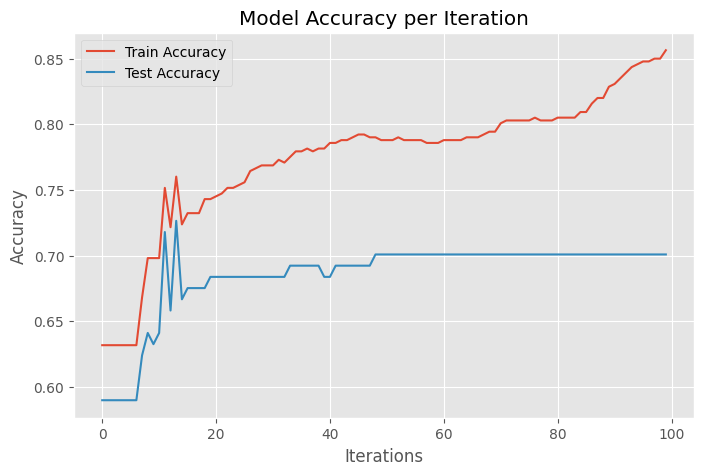

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

df = pd.read_excel("Dataset/NetflixOriginals.xlsx")

# Labeling Popular (1) dan Tidak Populer (0)
df['label'] = df['IMDB Score'].apply(lambda x: 1 if x >= 6.1 else 0)

# Encoding fitur kategori dengan one-hot encoding
df_encoded = pd.get_dummies(df[['Genre', 'Premiere', 'Runtime', 'Language']], drop_first=True)
X = df_encoded
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)

history = model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
train_accuracy = []
test_accuracy = []

# Loop untuk memantau akurasi selama training
for i, y_pred_train in enumerate(model.staged_predict(X_train)):
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, list(model.staged_predict(X_test))[i])
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Model Accuracy per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1. Menampilkan 5 genre film populer dan 5 genre film tidak populer.

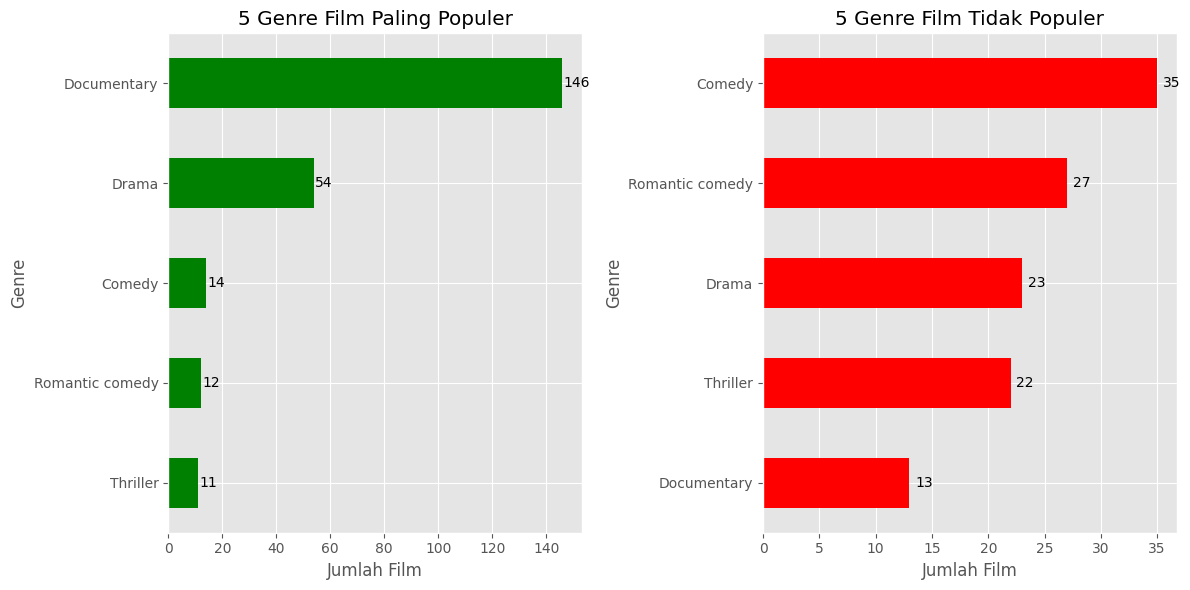

In [58]:
from sklearn.metrics import confusion_matrix

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

populer = df[df['label'] == 1]
tidak_populer = df[df['label'] == 0]

populer_per_genre = populer['Genre'].value_counts().head(5)
tidak_populer_per_genre = tidak_populer['Genre'].value_counts().head(5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
populer_per_genre.sort_values().plot(kind='barh', color='green')
plt.title('5 Genre Film Paling Populer')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
for i, value in enumerate(populer_per_genre.sort_values()):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.subplot(1, 2, 2)
tidak_populer_per_genre.sort_values().plot(kind='barh', color='red')
plt.title('5 Genre Film Tidak Populer')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
for i, value in enumerate(tidak_populer_per_genre.sort_values()):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


2. Menampilkan 5 bahasa film populer dan 5 bahasa film tidak populer.

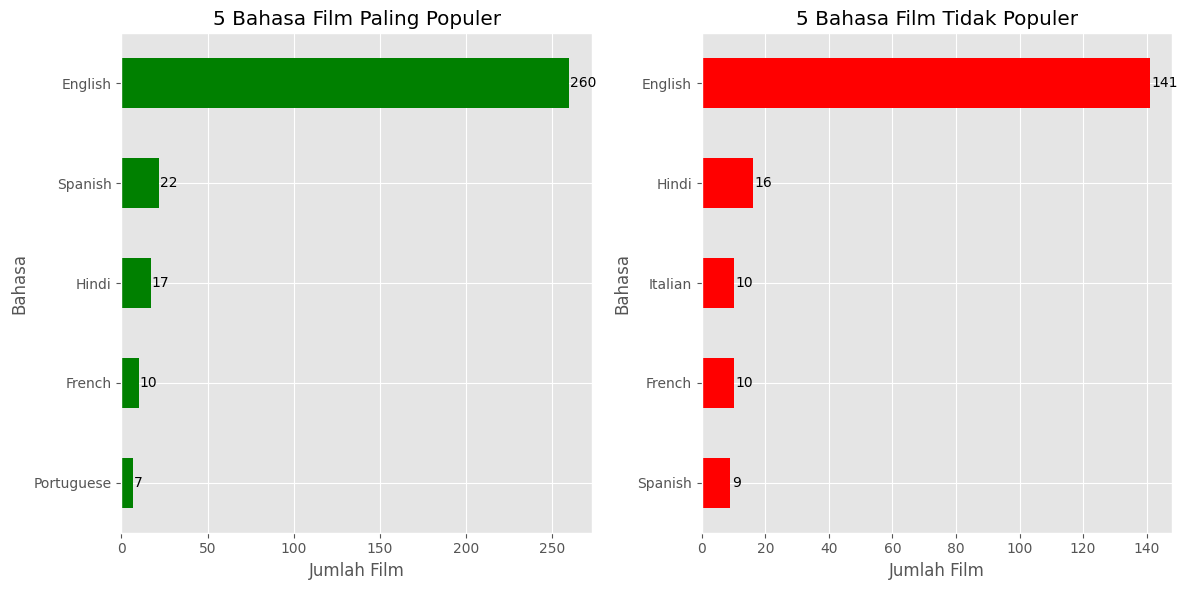

In [59]:
populer_per_language = populer['Language'].value_counts().head(5)
tidak_populer_per_language = tidak_populer['Language'].value_counts().head(5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
populer_per_language.sort_values().plot(kind='barh', color='green')
plt.title('5 Bahasa Film Paling Populer')
plt.xlabel('Jumlah Film')
plt.ylabel('Bahasa')
for i, value in enumerate(populer_per_language.sort_values()):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.subplot(1, 2, 2)
tidak_populer_per_language.sort_values().plot(kind='barh', color='red')
plt.title('5 Bahasa Film Tidak Populer')
plt.xlabel('Jumlah Film')
plt.ylabel('Bahasa')
for i, value in enumerate(tidak_populer_per_language.sort_values()):
    plt.text(value + 0.5, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()


3. Menampilkan 5 konten film populer dan 5 konten film tidak populer berdasarkan genre.

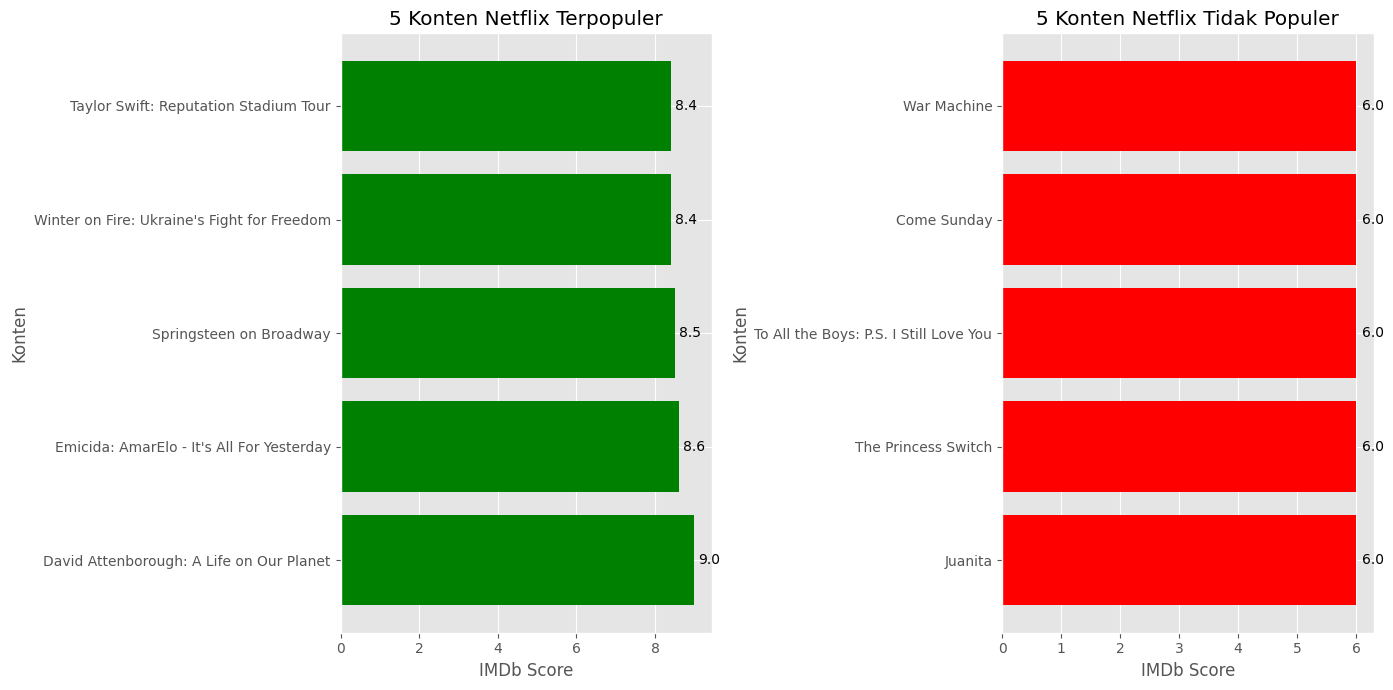

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

populer = df[df['label'] == 1]
tidak_populer = df[df['label'] == 0]

top_5_popular = populer.sort_values(by='IMDB Score', ascending=False).head(5)
top_5_not_popular = tidak_populer.sort_values(by='IMDB Score', ascending=False).head(5)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.barh(top_5_popular['Title'], top_5_popular['IMDB Score'], color='green')
plt.title('5 Konten Netflix Terpopuler')
plt.xlabel('IMDb Score')
plt.ylabel('Konten')
for i, value in enumerate(top_5_popular['IMDB Score']):
    plt.text(value + 0.1, i, str(value), va='center', fontsize=10)

plt.subplot(1, 2, 2)
plt.barh(top_5_not_popular['Title'], top_5_not_popular['IMDB Score'], color='red')
plt.title('5 Konten Netflix Tidak Populer')
plt.xlabel('IMDb Score')
plt.ylabel('Konten')
for i, value in enumerate(top_5_not_popular['IMDB Score']):
    plt.text(value + 0.1, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()
